| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Lion DUNGL</p> | 01553060 | 28.11.2019                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 (Assignment) -- Logistic Regression as door opener to Deep Learning</h2>

Authors: Brandstetter, Schäfl, Winter <br>
Date: 12-11-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

Copyright statement: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u3_utils</code>
- <code>numpy</code>
- <code>matplotlib.pyplot</code>
- <code>pandas</code>
- <code>seaborn</code>
- <code>torch</code>

In [1]:
import u3_utils as u3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import warnings
warnings.filterwarnings(r'ignore')

Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>median</i> of <code>[7, 2, 3]</code> and printing the result.

In [2]:
torch.median(torch.as_tensor([7, 2, 3], dtype=torch.float32))

tensor(3.)

# Exercise 1
In this exercise you will be working with a data set composed of various attributes (eventually) influencing the <i>house-prices</i> in <i>boston</i> (e.g. the <i>average number of rooms per dwelling</i>). For curious minds, more information regarding this data set can be found at:

<cite>The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.</cite>

As last time, we won't give you a description of the data set, as your <b>first task</b> requires you to get more familiar with it on your own. In order to achieve this, perform the following steps:

- Load the <i>boston</i> data set.
- Look at the first $n = 11$ samples of the data set.


- ... and follow any further instructions.

In [3]:
data = u3.load_boston()
data[:11]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Now you know more about the structure and features of your data set, but depending on the <i>target</i> type, different analysis approaches need to be applied. Are you being confronted with a <i>regression</i> or a <i>classification</i> task?

As the data set consists of more than $d = 3$ features, actually visualizing it is a non-trivial task. To simply things (for the moment), concentrate on the two columns <code>RM</code> and <code>target</code> and perform the following analysis steps:

- Plot the <i>boston</i> data set (keep in mind, which features to consider).
- Try to find appropriate model parameters $d$ and $k$.
- Plot the resulting model (keep in mind, which features to consider).

Is the resulting <i>regression line</i> a good <i>fit</i> for the underlying data?

# Answer
## Regression or classification?
It seems like target ∈ R, not target ∈ {1, ..., k}. This leads to the fact that this is a regression task.

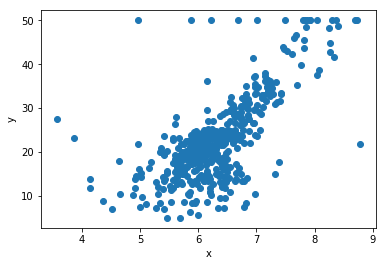

In [4]:
features = ["RM", "target"]
data_2D = pd.DataFrame(data[features], columns=features)

u3.plot_dataset(data_2D)

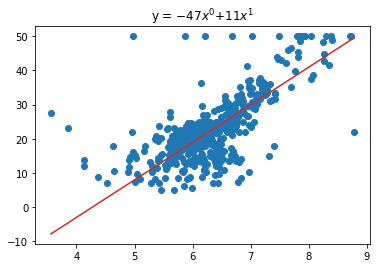

In [5]:
params = [11, -47] # k, d
u3.plot_model(data_2D, params)

# Answer
It seems like there is a linear correlation between the feature RM and the target, so the regression line is, in principle, a good fit. However, some aspects like that most of the sample-points are located approximately in the area RM = [5, 7] and target = [10, 25] where they form some kind of "ball" which is wider than the sample-clusters (I mean "Ansammlungen") in other areas, are not considered in this linear model.

Manually tweaking the model parameters $d$ and $k$ is a little bit of a hassle. Fortunately, there a better ways to find an appropriate <i>regression line</i>:

- Minimize the <i>mean squared error</i> of a degree $1$ <i>regression line</i>.
- Print the resulting parameter values of $d$ and $k$.
- Plot the resulting model and compare it with the <i>manually</i> tweaked version.

In [6]:
params = u3.minimize_MSE(data_2D, degree=1)
print(f"Optimal parameters are: k = {params[0]}, d = {params[1]}")

Optimal parameters are: k = 9.1, d = -34.67


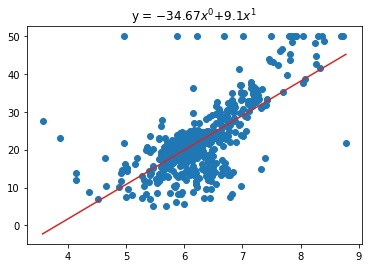

In [7]:
u3.plot_model(data_2D, params)

# Answer
The optimal regression line is a little bit lower located than my manually tweaked version. 

As a <i>degree</i> of $1$ may not be the best choice for the corresponding <i>regression line</i>, experiment with different settings and <i>visualise</i> the resulting models. For this very purpose, you could try the following two approaches:

- Try to manually tweak the parameters (e.g. $[k_2, k_1, d]$ defines a degree $2$ regression model).
- Minimise the <i>mean squared error</i> for varying degrees and <i>automatically</i> find an appropriate model.

Manually tweaked model:


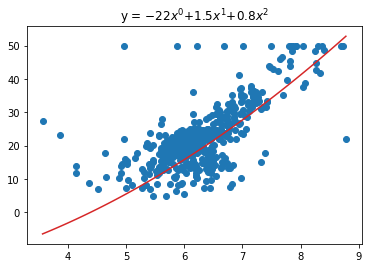

Optimal model:


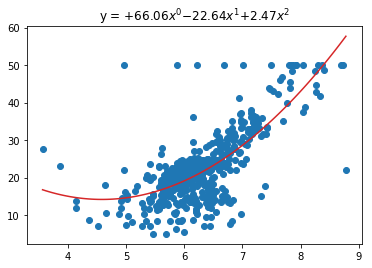

In [8]:
params = [0.8, 1.5, -22]
print("Manually tweaked model:")
u3.plot_model(data_2D, params)

params = u3.minimize_MSE(data_2D, degree=2)
print("Optimal model:")
u3.plot_model(data_2D, params)

The function with the lowest MSE is the following with the degree 5 and a MSE of 219.94501461099767:



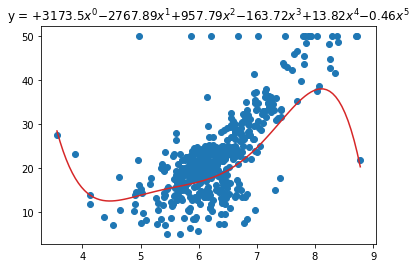

In [9]:
from sklearn.metrics import mean_squared_error 

MSE = {}

for degree in range(1, 100):
    parameters = u3.minimize_MSE(data_2D, degree=degree)
    
    xm = np.linspace(data_2D[data_2D.columns[0]].min(), data_2D[data_2D.columns[0]].max(), len(data_2D))
    params = parameters[::-1]
    ym = np.zeros_like(xm)
    label = 'y = '
    
    for degree in range(0, len(params)):
        ym += params[degree] * xm ** degree
        
    Y_true = data_2D['target']  
    mse = mean_squared_error(data_2D['target'], ym)
    MSE[degree] = mse

opt = min(MSE, key=MSE.get)



parameters = u3.minimize_MSE(data_2D, degree=opt)
xm = np.linspace(data_2D[data_2D.columns[0]].min(), data_2D[data_2D.columns[0]].max(), len(data_2D))
params = parameters[::-1]
ym = np.zeros_like(xm)

for degree in range(0, len(params)):
        ym += params[degree] * xm ** degree
        
mse = mean_squared_error(list(data_2D['target']), ym)

    
print(f"The function with the lowest MSE is the following with the degree {opt} and a MSE of {mse}:\n")
u3.plot_model(data_2D, parameters)

To get a better feeling for the data set and <i>regression</i> in general, shift your focus to the two columns <code>LSTAT</code> and <code>target</code> and perform the same analysis steps as before, starting with:

- Plot the <i>boston</i> data set (keep in mind, which features to consider).
- Try to find appropriate model parameters $d$ and $k$.
- Plot the resulting model (keep in mind, which features to consider).

Is the resulting <i>regression line</i> a good <i>fit</i> for the underlying data?

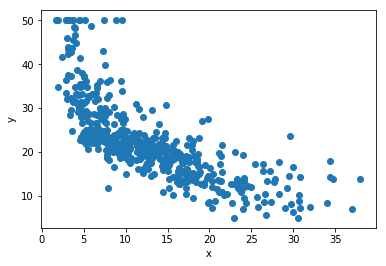

In [10]:
features = ["LSTAT", "target"]
data_2D = pd.DataFrame(data[features], columns=features)

u3.plot_dataset(data_2D)

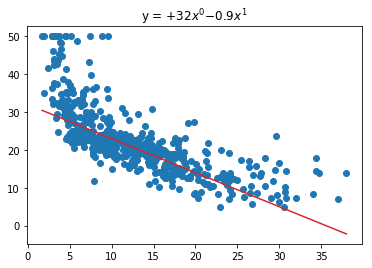

In [11]:
params = [-0.9, 32] # k, d
u3.plot_model(data_2D, params)

# Answer
It seems that there is some kind of correlation between the feature LSTAT and the target, but not necessarily a linear one, it looks more like a polynomial correlation. So in this case, the regression line is not a good fit for the underlying data.

Although manually tweaking $d$ and $k$ is still manageable, one does hit a wall pretty fast. Hence, try to <i>automatically</i> find an appropriate <i>regression line</i>:

- Minimize the <i>mean squared error</i> of a degree $1$ <i>regression line</i>.
- Print the resulting parameter values of $d$ and $k$.
- Plot the resulting model and compare it with the <i>manually</i> tweaked version.

In [12]:
params = u3.minimize_MSE(data_2D, degree=1)
print(f"Optimal parameters are: k = {params[0]}, d = {params[1]}")

Optimal parameters are: k = -0.95, d = 34.55


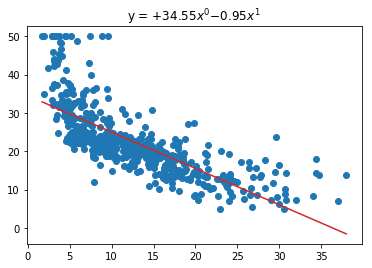

In [13]:
u3.plot_model(data_2D, params)

# Answer
In this case, the optimal regression line is located a little bit higher than my manually tweaked line.

Once again, experiment with different settings and <i>visualise</i> the resulting models. For this very purpose, you could try the following two approaches:

- Try to manually tweak the parameters (e.g. $[k_2, k_1, d]$ defines a degree $2$ regression model).
- Minimise the <i>mean squared error</i> for varying degrees and <i>automatically</i> find an appropriate model.

Manually tweaked model:


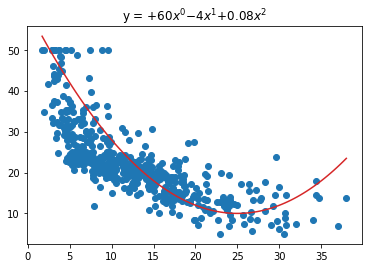

Optimal model:


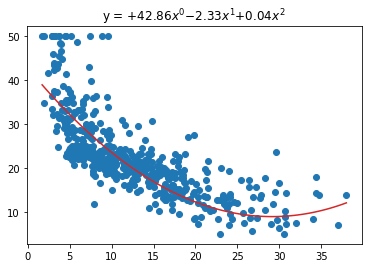

In [14]:
params = [0.08, -4, 60]
print("Manually tweaked model:")
u3.plot_model(data_2D, params)

params = u3.minimize_MSE(data_2D, degree=2)
print("Optimal model:")
u3.plot_model(data_2D, params)

The function with the lowest MSE is the following with the degree 2 and a MSE of 187.92474034338278:



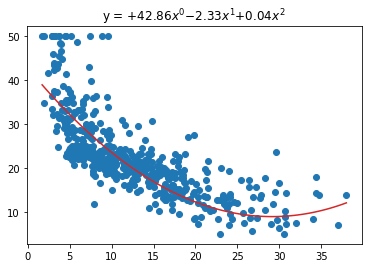

In [15]:
from sklearn.metrics import mean_squared_error 

MSE = {}

for degree in range(1, 100):
    parameters = u3.minimize_MSE(data_2D, degree=degree)
    
    xm = np.linspace(data_2D[data_2D.columns[0]].min(), data_2D[data_2D.columns[0]].max(), len(data_2D))
    params = parameters[::-1]
    ym = np.zeros_like(xm)
    label = 'y = '
    
    for degree in range(0, len(params)):
        ym += params[degree] * xm ** degree
        
    Y_true = data_2D['target']  
    mse = mean_squared_error(data_2D['target'], ym)
    MSE[degree] = mse

opt = min(MSE, key=MSE.get)



parameters = u3.minimize_MSE(data_2D, degree=opt)
xm = np.linspace(data_2D[data_2D.columns[0]].min(), data_2D[data_2D.columns[0]].max(), len(data_2D))
params = parameters[::-1]
ym = np.zeros_like(xm)

for degree in range(0, len(params)):
        ym += params[degree] * xm ** degree
        
mse = mean_squared_error(list(data_2D['target']), ym)

    
print(f"The function with the lowest MSE is the following with the degree {opt} and a MSE of {mse}:\n")
u3.plot_model(data_2D, parameters)

# Exercise 2

Without any doubt, you have already realized, that you are working with <i>regression</i> data. To spice things up a little bit, we want to change that now, so the <b>first task</b> of this exercise is to transform the data set to a <i>classification</i> task. For this very purpose:

- Again, concentrate only on the columns <code>LSTAT</code> and <code>target</code> and create a <i>new</i> data set.
- Compare every sample with the <i>median</i> of the feature column.
- Set the target to be $0$ for every entry with a feature value <i>smaller</i> than the <i>median</i>, $1$ otherwise.

In [16]:
data_class_simple = []

median = data["LSTAT"].median()
lstat = data["LSTAT"]

for sample in lstat:
    if sample < median:
        data_class_simple.append([sample, 0])
    else:
        data_class_simple.append([sample, 1])
        
data_class_simple = pd.DataFrame(data_class_simple, columns=["LSTAT", "target"])

As you are now working with a slightly different data set, polish up your knowledge by $\ldots$

- $\ldots$ looking at the first $n = 11$ samples.
- $\ldots$ plotting the newly constructed data set.

What do you observe (especially with respect to the plot)?

In [17]:
data_class_simple[:11]

,LSTAT,target
0,4.98,0
1,9.14,0
2,4.03,0
3,2.94,0
4,5.33,0
5,5.21,0
6,12.43,1
7,19.15,1
8,29.93,1
9,17.10,1


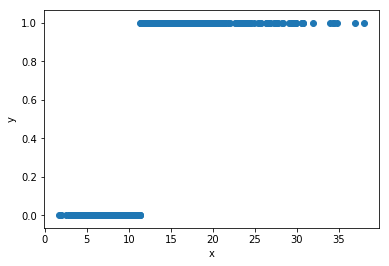

In [18]:
u3.plot_dataset(data_class_simple)

# Answer
## Observations
Since every sample was assigned to one of two classes, 0 or 1, the possible values for the target are only 0 or 1, too. This is visible in the plot: Every sample with a LSTAT-value below the median has the target-value 0. All those samples are forming one straight line. The same is to be observed for the samples with a LSTAT-value above the median, but with a target-value of 1. The value for LSTAT at which the target-value suddenly jumps from 0 to 1 is the median.

In comparison, for the regression task the plot was not that "clean", nearly every sample had an own, unique target-value.

Up until now, we minimised the <i>mean squared error</i> to automatically find appropriate model parameters. The reason for this was the <i>nature</i> of the underlying model, which was <i>linear</i>. The <b>second task</b> of this exercise requires you to:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Minimise the <i>cross entropy</i> using $n = 1000$ iterations, a learning rate of $0.1$ and a momentum term of $0.9$.
- Plot the resulting <i>logistic model</i> and experiment with different hyperparameter settings.

Keep in mind to use the newly constructed data set for this task, <i>not</i> the original one.

Model loss before optimization: 0.72
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.35


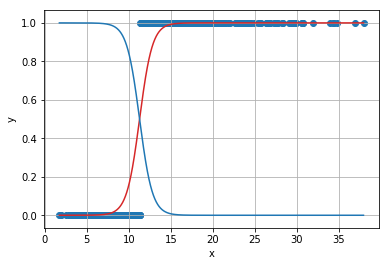

In [19]:
torch.manual_seed(42)
trained_model = u3.minimize_CE(data_class_simple, iters=1000, lr=0.1, momentum=0.9)

u3.plot_model_logistic(data_class_simple, trained_model)

Model loss before optimization: 0.79
performing 10 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.71


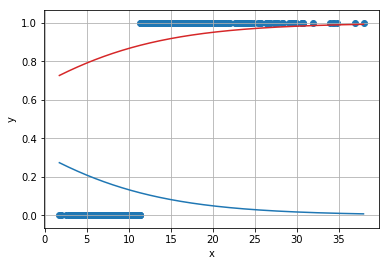

In [20]:
trained_model = u3.minimize_CE(data_class_simple, iters=10, lr=0.1, momentum=0.9)

u3.plot_model_logistic(data_class_simple, trained_model)

Model loss before optimization: 0.81
performing 1000 optimization steps with learning rate 1 ...
Model loss after optimization: 0.81


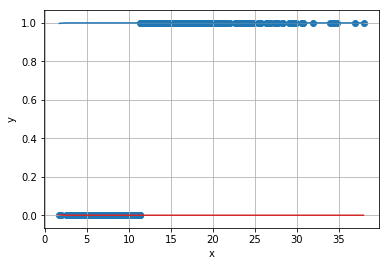

In [21]:
trained_model = u3.minimize_CE(data_class_simple, iters=1000, lr=1, momentum=0.9)

u3.plot_model_logistic(data_class_simple, trained_model)

Model loss before optimization: 0.82
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.81


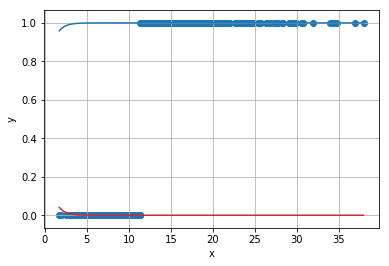

In [22]:
trained_model = u3.minimize_CE(data_class_simple, iters=1000, lr=0.1, momentum=0.2)

u3.plot_model_logistic(data_class_simple, trained_model)

Model loss before optimization: 0.83
performing 10000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.81


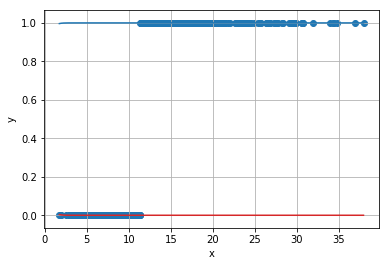

In [23]:
trained_model = u3.minimize_CE(data_class_simple, iters=10000, lr=0.1, momentum=0.9)

u3.plot_model_logistic(data_class_simple, trained_model)

The focus was set on <code>LSTAT</code> as the only feature column (to simplify the hands-on experience with <i>regressions</i>). By this time you are already an expert in analyzing the slimmed down data set, so as the next steps:

- Join the <i>original</i> data set with the customized <code>target</code> column.
- Keep in mind to <i>remove</i> or <i>overwrite</i> the original <code>target</code> column.
- Look at the first $n = 11$ samples of the data set.

In [24]:
data_class = pd.DataFrame(data, columns=data.columns)
data_class['target'] = data_class_simple["target"]
data_class[:11]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1


Concentrating on manually chosen features may be a good start to get more familiar with the data set, but we are interested in using as many useful information as possible. Hence, it is always a good idea to look for <i>correlations</i> in the data, maybe some features <i>can</i> be dropped without loosing insightful details.

For this very purpose, display and analyze possible correlations in the data using the following features/columns:

- <code>INDUS</code>
- <code>CHAS</code>
- <code>RM</code>
- <code>TAX</code>
- <code>LSTAT</code>

Do you observe some correlations?

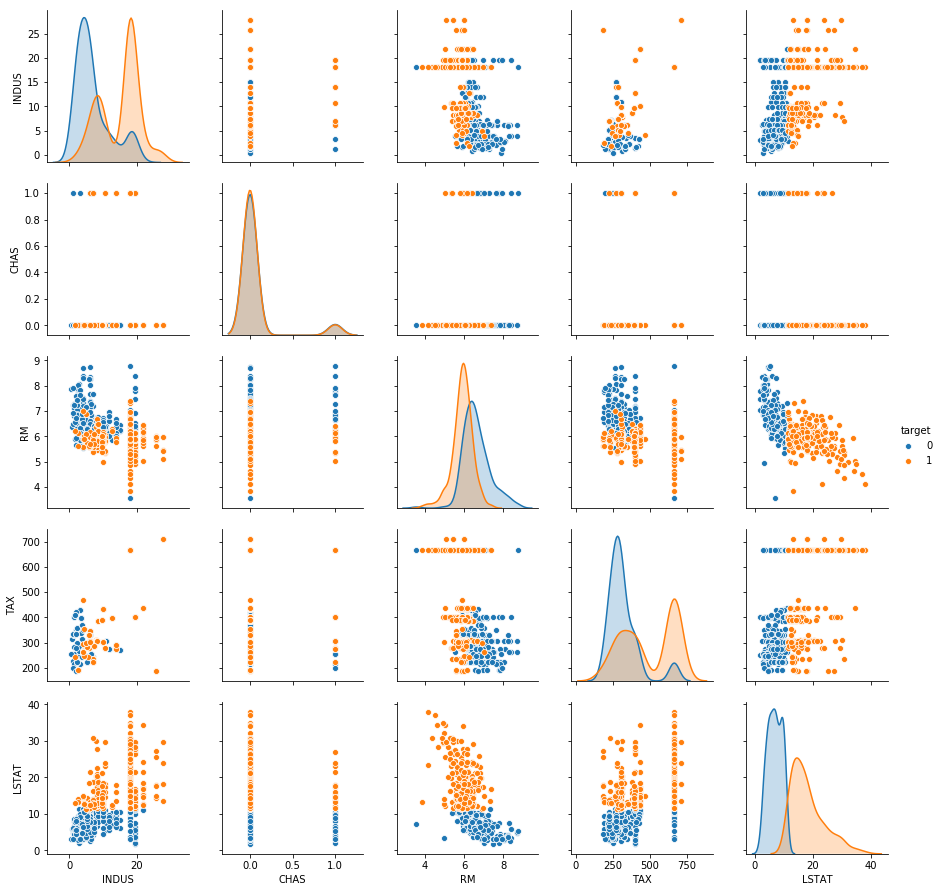

In [25]:
%matplotlib inline
list_of_features = ['INDUS', 'CHAS', 'RM', 'TAX', 'LSTAT']
sns.pairplot(data_class, vars=list_of_features, hue="target");

# Answer
## Observation of correlations
- There seems to be some kind of correlation between the features "RM" and "LSTAT", it looks like a polynomial correlation
- There seems to be a small correlation between the features "TAX" and "INDUS", it could be one of a linear kind
- There clearly seems to be no correlation between the feature "CHAS" and other features like "LSTAT"

With respect to the previous correlation plot, choose the <i>one</i> feature, which stands out the <i>most</i> compared to all others. Is this feature suitable for <i>discriminating</i> between the two <i>target</i> classes? Briefly discuss your answer. Moreover:

- Concentrate on the <i>previous</i> features, ignoring the one <i>chosen</i> according to the correlation plot.
- Apply <i>principal component analysis</i> for dimensionality reduction to $d = 2$ components.
- Create another data set comprising the two <i>components</i> as well as the <code>target</code> column.


- Look at the first $n = 11$ samples of the <i>new</i> data set.

# Answer
The feature "CHAS" stands out the most. It seems like CHAS represents classes, because the only values for it are 0 and 1. There is nothing in between. It is not suitable for discriminating between the two target classes, because there seems to be no kind of correlation. In every subplot, there are some samples with the target-value 0 in both the CHAS-classes and also samples with the target-value 1 in both CHAS-classes. It cannot be observed, that a particular target-class is mostly seen in a particular CHAS-class, therefore there exists no correlation and the CHAS feature is not suitable.

In [26]:
features = ["INDUS", "RM", "TAX", "LSTAT"]
data_class_features = pd.DataFrame(data_class[features], columns=features)
data_class_reduced = u3.apply_PCA(n_components=2, data=data_class_features)
data_class_reduced["target"] = data_class["target"]

data_class_reduced[:11]

,Component 1,Component 2,target
0,-112.595289,-7.100743,0
1,-166.321724,0.678215,0
2,-166.440560,-3.843379,0
3,-186.595046,-6.435154,0
4,-186.540082,-4.350023,0
5,-186.541977,-4.413146,0
6,-97.269988,1.598336,1
7,-97.115130,7.476303,1
8,-96.865741,16.952275,1
9,-97.162226,5.690156,1


As you are now working with a completely different data set, polish up your knowledge by $\ldots$

- $\ldots$ looking at the first $n = 11$ samples.
- $\ldots$ plotting the newly constructed data set using.

Keep in mind to set the <code>target</code> parameter appropriately in order to produce a <i>colored</i> scatter plot.

In [27]:
data_class_reduced[:11]

,Component 1,Component 2,target
0,-112.595289,-7.100743,0
1,-166.321724,0.678215,0
2,-166.440560,-3.843379,0
3,-186.595046,-6.435154,0
4,-186.540082,-4.350023,0
5,-186.541977,-4.413146,0
6,-97.269988,1.598336,1
7,-97.115130,7.476303,1
8,-96.865741,16.952275,1
9,-97.162226,5.690156,1


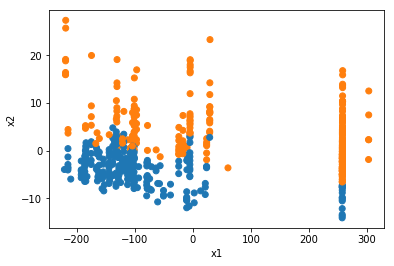

In [28]:
data_class_reduced_dat = data_class_reduced[["Component 1", "Component 2"]]
targets = data_class_reduced["target"]
u3.plot_dataset(data_class_reduced_dat, targets=targets)

As discussed during the lecture, before applying <i>any</i> algorithm, it is best to separate some samples, which act as the <i>test set</i>. Ultimately, we want to test our trained model on <i>unseen</i> data. Your <b>third task</b> of this exercise requires you to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface as well as the one of <i>numpy</i>.
- Split the <i>downprojected</i> data set in a way, so that the <i>test</i> set contains exactly $130$ samples.
- Minimise the <i>cross entropy</i> (<code>2D</code>) using $n = 1000$ iterations, a learning rate of $0.1$ and a momentum term of $0.9$.

Repeat the previous <i>three</i> steps multiple times, what do you observe? Briefly discuss a possible reason for this behavior.

In [29]:
torch.manual_seed(42)
np.random.seed(42)

X_train, X_test, y_train, y_test = u3.train_test_split(data_class_reduced_dat, targets, test_size = 0.2569)

In [30]:
trained_model = u3.minimize_CE_2D(X_train, y_train, iters=1000, lr=0.1, momentum=0.9)

Model loss before optimization: 79.77
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 514.89


In [31]:
torch.manual_seed(42)
np.random.seed(42)

X_train, X_test, y_train, y_test = u3.train_test_split(data_class_reduced_dat, targets, test_size = 0.2569)

trained_model = u3.minimize_CE_2D(X_train, y_train, iters=1000, lr=0.1, momentum=0.9)

Model loss before optimization: 79.77
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 514.89


In [32]:
torch.manual_seed(42)
np.random.seed(42)

X_train, X_test, y_train, y_test = u3.train_test_split(data_class_reduced_dat, targets, test_size = 0.2569)

trained_model = u3.minimize_CE_2D(X_train, y_train, iters=1000, lr=0.1, momentum=0.9)

Model loss before optimization: 79.77
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 514.89


# Answer
## Observation
It can be observed, that the model loss both before and after optimization is the same every repetition. In Assignment 2, this was not the case: Every repetition, the score changed a little bit. 
## Reason
At that time the reason for the changes was that train_test_split was splitting the dataset randomly in 2 parts, so everytime this step was repeated, the train- and the test-set looked different. Just their size was fixed. Therefore the scores were different for every repetition.

Now, train_test_split also splits the dataset randomly. But by fixing the random seed of numpy to any random number, like now to 42 (<i>the answer to the ultimate question of life, the universe, and everything</i>), the random splitting of the dataset always happens the same, in only one random way.

After training a model by <i>minimising</i> the <i>cross entropy</i>, apply said model once again on the <i>training</i> as well as on the  <i>test set</i>. Visualize the results in a <i>colored</i> scatter plot as discussed (shown) during the lecture.

Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 432x288 with 0 Axes>

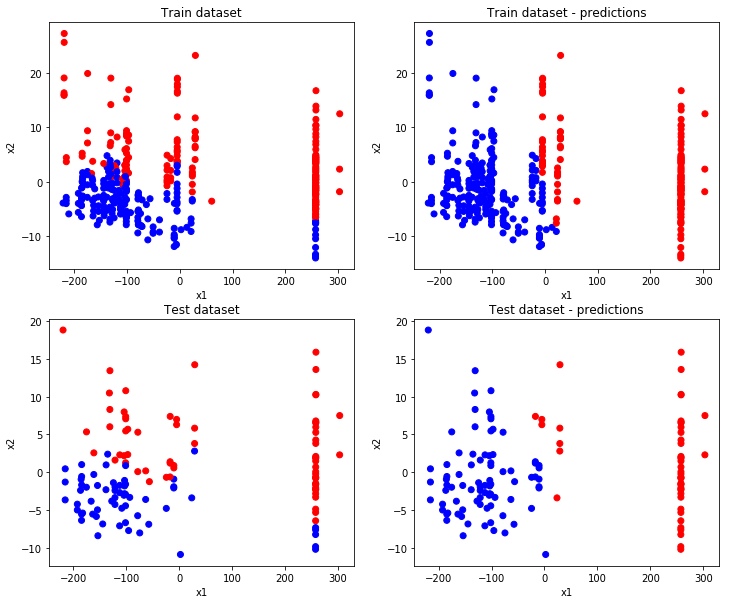

In [33]:
output_train = u3.apply_model(trained_model, X_train)
output_test = u3.apply_model(trained_model, X_test)

fig = plt.figure()
fig = plt.figure(figsize = (12,10))

plt.subplot(2, 2, 1)
color= ['red' if elem == 1 else 'blue' for elem in y_train]
plt.scatter(X_train["Component 1"], X_train["Component 2"], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Train dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem == 1 else 'blue' for elem in output_train ]
plt.scatter(X_train["Component 1"], X_train["Component 2"], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Train dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem == 1 else 'blue' for elem in y_test]
plt.scatter(X_test["Component 1"], X_test["Component 2"], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem == 1 else 'blue' for elem in output_test]
plt.scatter(X_test["Component 1"], X_test["Component 2"], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

# Exercise 3

During the lecture, a <i>framework</i> for supporting the development of scientific applications was introduced – <i>PyTorch</i>. As with a lot of interesting things, skill comes with practice (although you already touched said framework in the previous exercise). For this very purpose, your <b>first task</b> requires you to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create a <i>tensor</i> with $[23 \cdot 130 \cdot 89]$ elements and fill it with random numbers.
- Print the <i>type</i> of the resulting tensor as well as the <i>number</i> of elements.

In [34]:
torch.manual_seed(42)

x = torch.rand(23*130*89)

print(f"Type: {x.type()}")
print(f"Number of Elements: {x.numel()}")

Type: torch.FloatTensor
Number of Elements: 266110


Now <i>reshape</i> the tensor to a <i>three dimensional</i> one, with the the first <i>two</i> dimensions set to $23$ and $130$. Moreover, once again, print the the <i>type</i> of the resulting tensor as well as the <i>number</i> of elements.

- If a <i>CUDA</i> device is available, move the tensor to said device.
- Print the <i>type</i> of the resulting tensor as well as on which <i>device</i> it lives.

In [35]:
x = torch.reshape(x, [23, 130, -1])
print(f"Type: {x.type()}")
print(f"Number of Elements: {x.numel()}")

Type: torch.FloatTensor
Number of Elements: 266110


In [36]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

x = x.to(device)
print(f"x lives on the {x.device}")
print(f"Type: {x.type()}")

x lives on the cpu
Type: torch.FloatTensor


Your <b>second task</b> of this exercise is to experiment with the <i>automatic differentiation</i> functionality of the <i>PyTorch</i> framework. Given the following widely used function definition, the <i>Tangens hyperbolicus</i>, perform the following steps:

- Create a tensor with the value set to the <i>second</i> element of the very first list defined in <b>Exercise 0</b>.
- Set the <code>requires_grad</code> property appropriately (hint: we <i>are</i> requiring a gradient).
- Apply the <code>tanh</code> function on the newly created tensor.
- Compute the gradient of the <i>result</i> with respect to the input.

Report all <i>three</i> entities (<i>input</i>, <i>result</i> as well as <i>gradient</i> tensor) by printing them to the standard output.

In [37]:
def tanh(x: torch.Tensor) -> torch.Tensor:
    return (torch.exp(2 * x) - 1) / (torch.exp(2 * x) + 1)

In [38]:
tensx = torch.tensor(2., requires_grad=True)
tensy = tanh(tensx)
dtensy = u3.grad(tensy,tensx)

print("input  = {}".format(tensx.item()))
print("result  = {}".format(tensy.item()))
print("gradient = {}".format(dtensy[0].item()))

input  = 2.0
result  = 0.9640275835990906
gradient = 0.07065069675445557


Computing the <i>derivative</i> of a random scalar with respect to the input of a pretty small function is all well and good, but the <i>real</i> power of automatic differentiation lies in constructing the <i>gradient</i> of <i>complicated</i> functions with respect to <i>tensor</i> inputs. Hence, the <b>third</b> task of this exericse requires you to:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>cifar</i> data set (returns the <i>training</i> as well as the <i>test</i> set).
- Display the first <i>three</i> images of the <i>cifar</i> data set.

Can you identify possible <i>labels</i> of the three images?

In [39]:
torch.manual_seed(42)

train_set, test_set = u3.load_cifar()

Files already downloaded and verified
Files already downloaded and verified


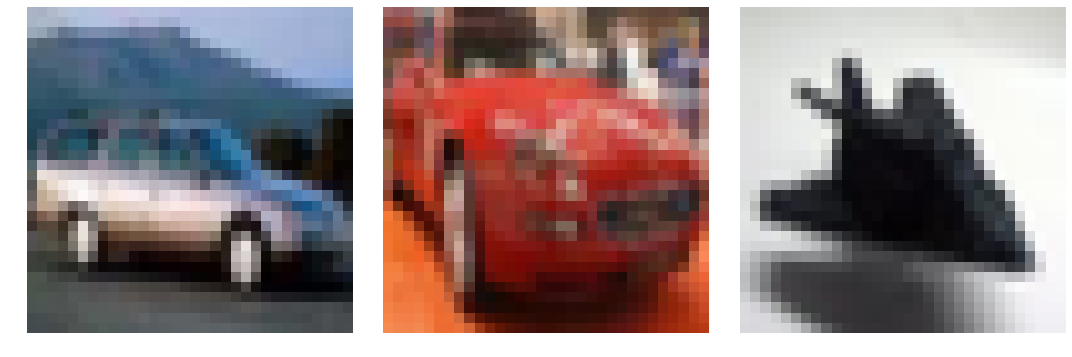

In [40]:
u3.display_CIFAR(train_set)

In [41]:
train_set[:11]

[(tensor([[[0.6667, 0.6588, 0.6941,  ..., 0.6353, 0.6196, 0.6157],
           [0.6588, 0.6745, 0.6706,  ..., 0.6235, 0.6118, 0.6039],
           [0.6039, 0.5843, 0.5059,  ..., 0.6314, 0.6157, 0.6039],
           ...,
           [0.2902, 0.2980, 0.3059,  ..., 0.2784, 0.2667, 0.2392],
           [0.2667, 0.2706, 0.2824,  ..., 0.2980, 0.2784, 0.2784],
           [0.2627, 0.2667, 0.2706,  ..., 0.2941, 0.2784, 0.2863]],
  
          [[0.7059, 0.6980, 0.7255,  ..., 0.7020, 0.6980, 0.6941],
           [0.7098, 0.7255, 0.7176,  ..., 0.6941, 0.6902, 0.6824],
           [0.6667, 0.6471, 0.5647,  ..., 0.6980, 0.6941, 0.6824],
           ...,
           [0.3294, 0.3333, 0.3333,  ..., 0.2941, 0.2824, 0.2549],
           [0.2980, 0.3020, 0.3098,  ..., 0.3137, 0.2941, 0.2941],
           [0.2941, 0.2980, 0.2941,  ..., 0.3098, 0.2941, 0.3020]],
  
          [[0.7765, 0.7686, 0.7961,  ..., 0.8431, 0.8392, 0.8314],
           [0.7765, 0.7882, 0.7843,  ..., 0.8314, 0.8275, 0.8196],
           [0.7294, 0.

# Answer
## Possible Labels
- Picture 1: Car
- Picture 2: Car
- Picture 3: No car


(or

- Picture 1: Car
- Picture 2: Car
- Picture 3: Manta Ray)

In order to define a <i>logistic regression</i> model for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the <i>input dimensionality</i> of the data set.
- Set the output dimensionality to be $d_{out} = 2$

In [42]:
train_image_zero, train_target_zero = train_set[0]
input_dim = train_image_zero.shape[0] * train_image_zero.shape[1] * train_image_zero.shape[2]
output_dim = 2

print(f"Input dimension is {input_dim}")

Input dimension is 3072


Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 15</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>logistic regression</i> model, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.



In [43]:
args00 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.001, momentum=0.9, log_interval=100)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=args00.batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=args00.batch_size, shuffle=True)

In [44]:
model = u3.LogisticRegression(input_dim, output_dim).to(device)

optimizer = u3.optim.SGD(model.parameters(), lr=args00.lr, 
                      momentum=args00.momentum)

Train the previously defined <i>logistic regression</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [45]:
for epoch in range(1, args00.epochs + 1):
    u3.train(args00, model, device, train_loader, optimizer, epoch, input_dim)
    u3.test(args00, model, device, test_loader, input_dim)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.426677
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.343825

Test set: Average loss: 0.4533, Accuracy: 1599/2000 (79.95%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.472961
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.421018

Test set: Average loss: 0.4347, Accuracy: 1601/2000 (80.05%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.470346
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.644737

Test set: Average loss: 0.4321, Accuracy: 1623/2000 (81.15%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.426630
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.332224

Test set: Average loss: 0.4180, Accuracy: 1633/2000 (81.65%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.400846
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.439134

Test set: Average loss: 0.4148, Accuracy: 1634/2000 (81.70%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.482580
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.380431

Test set: Average loss: 0.4174, Accuracy: 1617/2000 (80.85%)

Train Epoc

In [46]:
def training(args):
    model = u3.LogisticRegression(input_dim, output_dim).to(device)
    optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    
    for epoch in range(1, args.epochs + 1):
        u3.train(args, model, device, train_loader, optimizer, epoch, input_dim)
        u3.test(args, model, device, test_loader, input_dim)

In [47]:
# lr = 0.0000000001

args01 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.0000000001, momentum=0.9, log_interval=100)
training(args01)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.753618
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.835200

Test set: Average loss: 0.9353, Accuracy: 1000/2000 (50.00%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.987645
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.641369

Test set: Average loss: 0.9353, Accuracy: 1000/2000 (50.00%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 1.047543
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.801977

Test set: Average loss: 0.9353, Accuracy: 1000/2000 (50.00%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.994188
Train Epoch: 04 [10000/10000 (100%)]	Loss: 1.129575

Test set: Average loss: 0.9353, Accuracy: 1000/2000 (50.00%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.781529
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.783191

Test set: Average loss: 0.9352, Accuracy: 1000/2000 (50.00%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.915997
Train Epoch: 06 [10000/10000 (100%)]	Loss: 1.088320

Test set: Average loss: 0.9352, Accuracy: 1000/2000 (50.00%)

Train Epoc

In [48]:
# lr = 1

args02 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=1, momentum=0.9, log_interval=100)
training(args02)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 60.761147
Train Epoch: 01 [10000/10000 (100%)]	Loss: 30.982866

Test set: Average loss: 154.8991, Accuracy: 1205/2000 (60.25%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 50.496223
Train Epoch: 02 [10000/10000 (100%)]	Loss: 192.276184

Test set: Average loss: 34.6734, Accuracy: 1578/2000 (78.90%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 65.652946
Train Epoch: 03 [10000/10000 (100%)]	Loss: 52.277710

Test set: Average loss: 128.5462, Accuracy: 1084/2000 (54.20%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 13.357531
Train Epoch: 04 [10000/10000 (100%)]	Loss: 58.024189

Test set: Average loss: 79.1358, Accuracy: 1355/2000 (67.75%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 26.000826
Train Epoch: 05 [10000/10000 (100%)]	Loss: 59.216591

Test set: Average loss: 40.8152, Accuracy: 1617/2000 (80.85%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 43.834610
Train Epoch: 06 [10000/10000 (100%)]	Loss: 149.818481

Test set: Average loss: 205.6221, Accuracy: 1105/20

In [49]:
# lr = 10000

args03 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=10000, momentum=0.9, log_interval=100)
training(args03)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 3204286.500000
Train Epoch: 01 [10000/10000 (100%)]	Loss: 791425.687500

Test set: Average loss: 784860.9120, Accuracy: 1425/2000 (71.25%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 1778383.000000
Train Epoch: 02 [10000/10000 (100%)]	Loss: 727967.250000

Test set: Average loss: 621535.4420, Accuracy: 1509/2000 (75.45%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 229636.375000
Train Epoch: 03 [10000/10000 (100%)]	Loss: 549154.375000

Test set: Average loss: 324428.7335, Accuracy: 1613/2000 (80.65%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 651231.625000
Train Epoch: 04 [10000/10000 (100%)]	Loss: 1520025.125000

Test set: Average loss: 1006566.1450, Accuracy: 1287/2000 (64.35%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 242252.953125
Train Epoch: 05 [10000/10000 (100%)]	Loss: 629025.875000

Test set: Average loss: 444153.7660, Accuracy: 1544/2000 (77.20%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 286645.531250
Train Epoch: 06 [10000/10000 (100%)]	Loss

In [50]:
# epochs = 1

args04 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)
training(args04)

Train Epoch: 1 [6400/10000 (64%)]	Loss: 0.480125
Train Epoch: 1 [10000/10000 (100%)]	Loss: 0.294212

Test set: Average loss: 0.4566, Accuracy: 1590/2000 (79.50%)



In [51]:
# epochs = 5

args05 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5, lr=0.001, momentum=0.9, log_interval=100)
training(args05)

Train Epoch: 1 [6400/10000 (64%)]	Loss: 0.454360
Train Epoch: 1 [10000/10000 (100%)]	Loss: 0.311184

Test set: Average loss: 0.4593, Accuracy: 1560/2000 (78.00%)

Train Epoch: 2 [6400/10000 (64%)]	Loss: 0.549289
Train Epoch: 2 [10000/10000 (100%)]	Loss: 0.522137

Test set: Average loss: 0.4347, Accuracy: 1605/2000 (80.25%)

Train Epoch: 3 [6400/10000 (64%)]	Loss: 0.372150
Train Epoch: 3 [10000/10000 (100%)]	Loss: 0.597379

Test set: Average loss: 0.4244, Accuracy: 1636/2000 (81.80%)

Train Epoch: 4 [6400/10000 (64%)]	Loss: 0.478844
Train Epoch: 4 [10000/10000 (100%)]	Loss: 0.261505

Test set: Average loss: 0.4350, Accuracy: 1593/2000 (79.65%)

Train Epoch: 5 [6400/10000 (64%)]	Loss: 0.434482
Train Epoch: 5 [10000/10000 (100%)]	Loss: 0.340584

Test set: Average loss: 0.4157, Accuracy: 1624/2000 (81.20%)



In [52]:
# epochs = 50

args06 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=50, lr=0.001, momentum=0.9, log_interval=100)
training(args06)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.515947
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.599082

Test set: Average loss: 0.4518, Accuracy: 1584/2000 (79.20%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.401769
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.480663

Test set: Average loss: 0.4326, Accuracy: 1619/2000 (80.95%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.540568
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.256151

Test set: Average loss: 0.4242, Accuracy: 1627/2000 (81.35%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.521001
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.301160

Test set: Average loss: 0.4166, Accuracy: 1640/2000 (82.00%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.389291
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.287328

Test set: Average loss: 0.4669, Accuracy: 1541/2000 (77.05%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.370894
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.218288

Test set: Average loss: 0.4247, Accuracy: 1623/2000 (81.15%)

Train Epoc

In [53]:
# momentum = 0.00000001

args07 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.001, momentum=0.00000001, log_interval=100)
training(args07)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.604993
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.574103

Test set: Average loss: 0.5624, Accuracy: 1499/2000 (74.95%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.604171
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.579061

Test set: Average loss: 0.5190, Accuracy: 1537/2000 (76.85%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.503857
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.522179

Test set: Average loss: 0.5099, Accuracy: 1493/2000 (74.65%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.441889
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.514523

Test set: Average loss: 0.5027, Accuracy: 1489/2000 (74.45%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.458617
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.376714

Test set: Average loss: 0.4746, Accuracy: 1583/2000 (79.15%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.488703
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.430768

Test set: Average loss: 0.4685, Accuracy: 1573/2000 (78.65%)

Train Epoc

In [54]:
# momentum = 0.5

args08 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.001, momentum=0.5, log_interval=100)
training(args08)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.542192
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.553095

Test set: Average loss: 0.5196, Accuracy: 1555/2000 (77.75%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.550813
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.434042

Test set: Average loss: 0.4859, Accuracy: 1533/2000 (76.65%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.504580
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.475886

Test set: Average loss: 0.4671, Accuracy: 1578/2000 (78.90%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.467535
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.527859

Test set: Average loss: 0.4636, Accuracy: 1556/2000 (77.80%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.446296
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.409379

Test set: Average loss: 0.4530, Accuracy: 1588/2000 (79.40%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.419619
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.490582

Test set: Average loss: 0.4511, Accuracy: 1566/2000 (78.30%)

Train Epoc

In [55]:
# momentum = 1

args09 = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.001, momentum=0.999, log_interval=100)
training(args09)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.634483
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.424426

Test set: Average loss: 0.5705, Accuracy: 1543/2000 (77.15%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 1.021847
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.733024

Test set: Average loss: 0.6954, Accuracy: 1570/2000 (78.50%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.883504
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.432720

Test set: Average loss: 0.8106, Accuracy: 1483/2000 (74.15%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.657066
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.896003

Test set: Average loss: 0.7312, Accuracy: 1627/2000 (81.35%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.649986
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.430397

Test set: Average loss: 0.7063, Accuracy: 1567/2000 (78.35%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 1.302137
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.856475

Test set: Average loss: 1.3359, Accuracy: 1374/2000 (68.70%)

Train Epoc

# Answer
- A very low learning rate leads to an average loss that barely changes every epoch. This is because with a very low learning rate near 0, the parameters which are to be optimised are changing by e.g. "derivation * 0.0000001" every iteration, so practically they aren't changing at all. Therefore, the average loss is staying the same, too.
- A very high learning rate leads to a high average loss in general on the one hand, an on the other hand to an average loss, that is strongly changing every epoch. The reason for this is because no the exact opposite than in the point above is the case: The parameters which are to be optimised are changing by e.g. "derivation * 1000" every iteration, so they are changing very much. Therefore sometimes the parameters may be near the optimum, but already in the next iteration they could be far away from it.
- Training with only one epoch results in a greater loss than training with more epochs.

As already discussing during the lecture, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>cifar</i> data set with a <code>flip_probability</code> of $p = 1$.
- Display the first <i>three</i> images of the <i>cifar</i> data set.

Can you identify possible <i>labels</i> of the three images? How do they differ from the previous visualisation?

- Repeat the previous <i>training</i> and <i>testing</i> procedure.

Files already downloaded and verified
Files already downloaded and verified


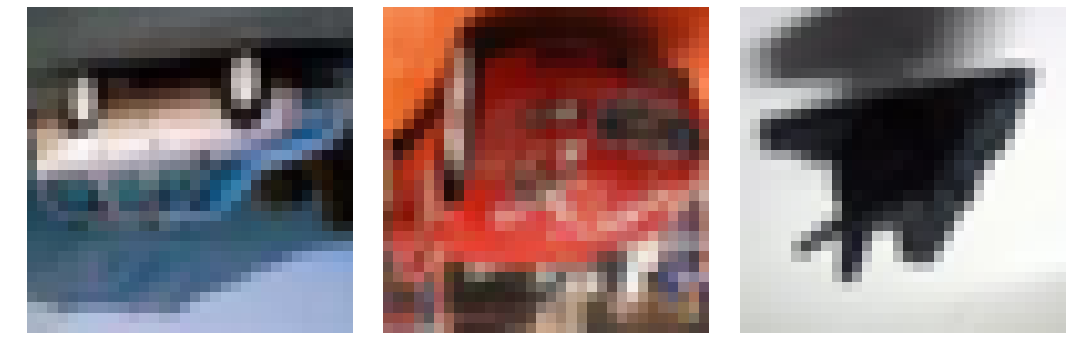

In [56]:
torch.manual_seed(42)

train_set_flipped, test_set_flipped = u3.load_cifar(flip_probability=1)
u3.display_CIFAR(train_set_flipped)

# Answer
- Picture 1: Car
- Picture 2: Car
- Picture 3: No car

or

- Picture 1: Car
- Picture 2: Car
- Picture 3: Paperplane

I would label the third picture different in its flipped state different than before. The cars are, in my opinion, as well visible as before.

In [57]:
train_image_zero, train_target_zero = train_set_flipped[0]
input_dim = train_image_zero.shape[0] * train_image_zero.shape[1] * train_image_zero.shape[2]
output_dim = 2

print(f"Input dimension is {input_dim}")

Input dimension is 3072


In [58]:
args = u3.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=15, lr=0.001, momentum=0.9, log_interval=100)

train_loader_flipped = torch.utils.data.DataLoader(train_set_flipped, batch_size=args.batch_size, shuffle=True)
test_loader_flipped = torch.utils.data.DataLoader(test_set_flipped, batch_size=args.batch_size, shuffle=True)

model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
        u3.train(args, model_flipped, device, train_loader_flipped, optimizer, epoch, input_dim)
        u3.test(args, model_flipped, device, test_loader_flipped, input_dim)

Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.423152
Train Epoch: 01 [10000/10000 (100%)]	Loss: 0.333351

Test set: Average loss: 0.4534, Accuracy: 1592/2000 (79.60%)

Train Epoch: 02 [6400/10000 (64%)]	Loss: 0.479054
Train Epoch: 02 [10000/10000 (100%)]	Loss: 0.441138

Test set: Average loss: 0.4335, Accuracy: 1609/2000 (80.45%)

Train Epoch: 03 [6400/10000 (64%)]	Loss: 0.466023
Train Epoch: 03 [10000/10000 (100%)]	Loss: 0.648340

Test set: Average loss: 0.4308, Accuracy: 1620/2000 (81.00%)

Train Epoch: 04 [6400/10000 (64%)]	Loss: 0.433558
Train Epoch: 04 [10000/10000 (100%)]	Loss: 0.343408

Test set: Average loss: 0.4172, Accuracy: 1636/2000 (81.80%)

Train Epoch: 05 [6400/10000 (64%)]	Loss: 0.397060
Train Epoch: 05 [10000/10000 (100%)]	Loss: 0.436676

Test set: Average loss: 0.4144, Accuracy: 1632/2000 (81.60%)

Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.479684
Train Epoch: 06 [10000/10000 (100%)]	Loss: 0.371232

Test set: Average loss: 0.4165, Accuracy: 1615/2000 (80.75%)

Train Epoc

After having trained a model on the <i>original</i> CIFAR images (to be more precise, on an appropriate subset) and on the <i>flipped</i> ones, evaluate both in the following way:

- Test the <i>flipped</i> model on the <i>original</i> test data set.
- Test the <i>original</i> model on the <i>flipped</i> test data set.

Do you observe any performance <i>penalties</i> at all?

In [59]:
u3.test(args, model_flipped, device, test_loader, input_dim)


Test set: Average loss: 0.8694, Accuracy: 1202/2000 (60.10%)



In [60]:
u3.test(args, model, device, test_loader_flipped, input_dim)


Test set: Average loss: 0.8695, Accuracy: 1206/2000 (60.30%)



# Answer
## Observation of performance penalties
The average loss is about 0.4 higher and the accuracy is about 20% lower when testing the flipped model on the original test data set and testing the original model on the flipped test data set. So a performance penalty can be observed.